###**Explainable Fake News Detection (Classical NLP + ML + Streamlit)**

###DATA UPLOADING

In [ ]:
import pandas as pd

fake = pd.read_csv("/content/Fake.csv")
#fake
true = pd.read_csv("/content/True.csv")
#true

fake['label'] = 0
true['label'] = 1

df = pd.concat([fake, true], axis=0)
df = df[['title','text','label']]
df.reset_index(drop=True,inplace=True)

df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
df['content'] = df[['title', 'text']].astype(str).agg(' '.join, axis=1)
df

,title,text,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,'Fully committed' NATO backs new U.S. approach...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,LexisNexis withdrew two products from Chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,Minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,Vatican upbeat on possibility of Pope Francis ...


What your output shows

* title column → intact

* text column → intact

* label column → intact

* content column → correct concatenation of title + text


content--	Final text input for NLP models

label--	Target variable (0 = Fake, 1 = Real)

In [ ]:
df[['title', 'text', 'content', 'label']].sample(3)


,title,text,content,label
12878,‘SOUTH PARK’ MOCKS HILLARY CLINTON: Hilarious ...,South Park parodied former Secretary of State...,‘SOUTH PARK’ MOCKS HILLARY CLINTON: Hilarious ...,0
9071,TUCKER CARLSON Rips The Left On Gun Control Hy...,Tucker Carlson weighed in on the hysteria over...,TUCKER CARLSON Rips The Left On Gun Control Hy...,0
19406,EXPOSED: Why A Liberal’s Defense Of RADICAL IS...,Liberals would like you to believe they re mor...,EXPOSED: Why A Liberal’s Defense Of RADICAL IS...,0


In [ ]:
df = df[['content', 'label']]
df

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,1
44894,LexisNexis withdrew two products from Chinese ...,1
44895,Minsk cultural hub becomes haven from authorit...,1
44896,Vatican upbeat on possibility of Pope Francis ...,1


###TEXT CLEANING

In [ ]:
import re

def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+","",text)
  text = re.sub(r"<.*?>","",text)
  text = re.sub(r"[^a-z\s]","",text)
  return text

df['content'] = df['content'].apply(clean_text)

/tmp/ipython-input-3400339170.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Fake vs Real News Distribution')

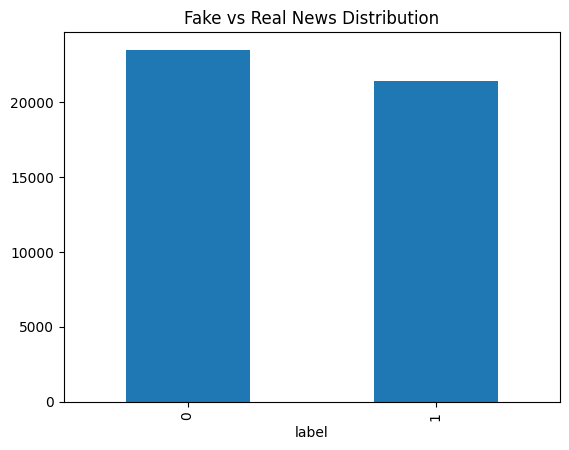

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['label'].value_counts().plot(kind='bar')
plt.title("Fake vs Real News Distribution")

In [ ]:
df['label'].value_counts()

,count
label,
0,23481
1,21417


In [ ]:
df['length'] = df['content'].apply(lambda x: len(x.split()))
df.groupby('label')['length'].mean()

/tmp/ipython-input-604862267.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,length
label,
0,432.777565
1,388.951674


Fake news articles are longer on average than real news articles in this dataset.

In [ ]:
#Mostt Common word

from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def most_common_words(texts,n=20):
  words = []
  for text in texts:
    words.extend([w for w in text.split() if w not in stop_words])
  return Counter(words).most_common(n)

fake_words = most_common_words(df[df['label']==0]['content'])
real_words = most_common_words(df[df['label']==1]['content'])

fake_words[:10],real_words[:10]

([('trump', 81157),
  ('said', 31208),
  ('president', 26668),
  ('people', 26449),
  ('would', 23679),
  ('one', 23516),
  ('us', 23095),
  ('obama', 19624),
  ('clinton', 18977),
  ('donald', 18054)],
 [('said', 99053),
  ('trump', 47334),
  ('us', 45174),
  ('would', 31750),
  ('reuters', 28463),
  ('president', 26008),
  ('state', 19381),
  ('government', 18386),
  ('house', 17843),
  ('states', 17819)])

In [ ]:
#Vocabulary Size Comparison (unique words or tokens)
#Vocabulary size = number of unique words
def vocab_size(texts):
  vocab = set()
  for text in texts:
    vocab.update(text.split())
  return len(vocab)

fake_vocab = vocab_size(df[df['label']==0]['content'])
real_vocab = vocab_size(df[df['label']==1]['content'])

fake_vocab, real_vocab

(175034, 78737)

Vocabulary analysis shows that fake news articles exhibit significantly higher lexical diversity than real news. This suggests that fake news relies on varied narrative expressions, while real news follows standardized journalistic language, resulting in a smaller and more controlled vocabulary.

###FEATURE ENGINEERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features= 10000,
    ngram_range = (1,2)
)

X = tfidf.fit_transform(df['content'])
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

###MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Linear SVM
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

Evaluation

In [ ]:
from sklearn.metrics import classification_report

print("LR\n", classification_report(y_test, lr.predict(X_test)))
print("SVM\n", classification_report(y_test, svm.predict(X_test)))

LR
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

SVM
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
from sklearn.metrics import f1_score

train_pred = svm.predict(X_train)
test_pred = svm.predict(X_test)

print("Train F1:", f1_score(y_train, train_pred))
print("Test F1:",f1_score(y_test, test_pred))

Train F1: 0.9997961620220728
Test F1: 0.995996231747527


In [ ]:
import joblib
import os

model_dir = "/content/drive/MyDrive/Explainable_Fake_News/models/"
os.makedirs(model_dir, exist_ok=True)

joblib.dump(svm, os.path.join(model_dir, "model.pkl"))
joblib.dump(tfidf, os.path.join(model_dir, "vectorizer.pkl"))

['/content/drive/MyDrive/Explainable_Fake_News/models/vectorizer.pkl']

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

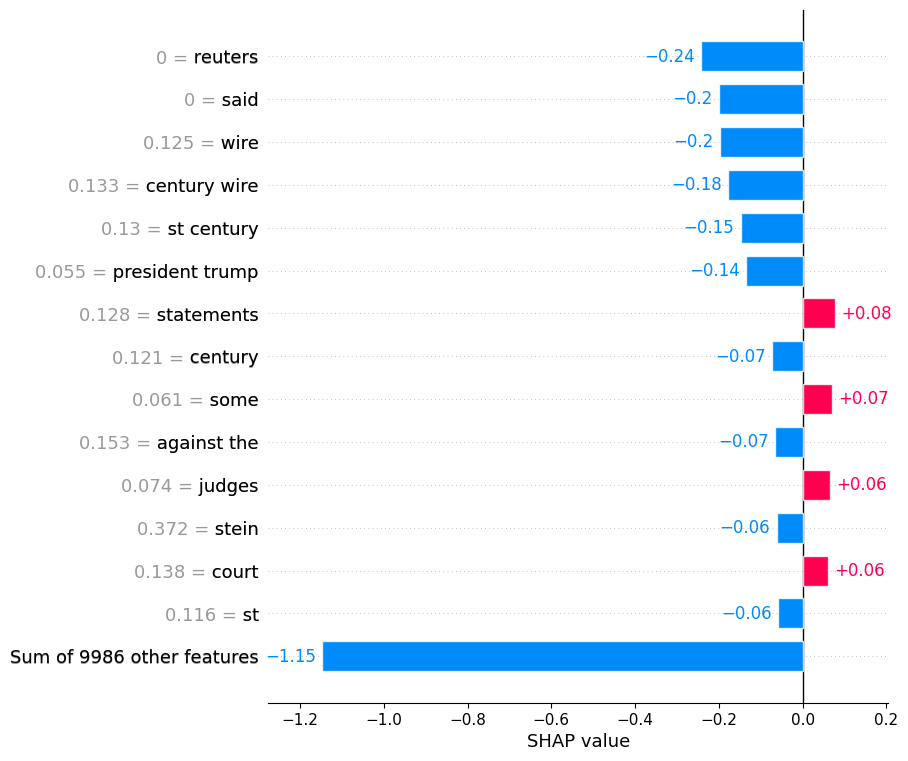

In [ ]:
explanation_obj = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test[0].toarray()[0], # Corrected: access the first row to get a 1D array
    feature_names=tfidf.get_feature_names_out()
)
shap.plots.bar(explanation_obj, max_display=15)

In [ ]:
explainer = shap.LinearExplainer(svm, X_train)
shap_values = explainer.shap_values(X_test[:1])

shap.force_plot(
    explainer.expected_value,
    shap_values,
    X_test[:1].toarray(), # Convert sparse matrix to dense array
    feature_names=tfidf.get_feature_names_out()
)

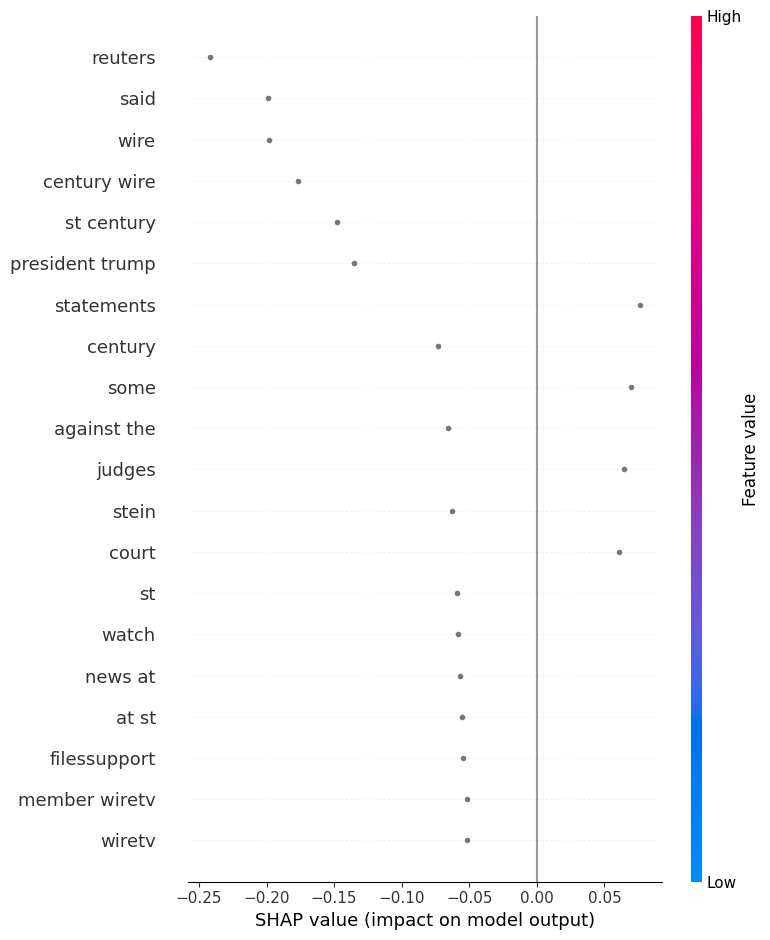

In [ ]:
shap.summary_plot(
    shap_values,
    X_test[:1],
    feature_names=tfidf.get_feature_names_out()
)
